## Malaria Statistics


In [8]:
import numpy as np
import pandas as pd

#World Health Oranization's raw data on reported cases of Malaria by Country

f1 = r'C:\Users\Katie\Documents\Data Projects\Malaria\WHO Malaria Reported Cases Dec-15.csv'
df = pd.read_csv(f1, header = 1, index_col = 'Country')

#Remove space seperators from large numbers.
#Re-order columns in ascending year
old_col = []
for n in range(2000,2015):
    df[str(n)] = df[str(n)].str.replace(' ', '')
    df[str(n)] = pd.to_numeric(df[str(n)])
    old_col.append(str(n))
    
df = df[old_col]
df.rename(columns = lambda x: x + '_cases' , inplace = True)
df



,2000_cases,2001_cases,2002_cases,2003_cases,2004_cases,2005_cases,2006_cases,2007_cases,2008_cases,2009_cases,2010_cases,2011_cases,2012_cases,2013_cases,2014_cases
Country,,,,,,,,,,,,,,,
Afghanistan,94475.0,NaN,415356.0,360940.0,242022.0,116444.0,86129.0,92202.0,81574.0,64880.0,69397.0,77549.0,54840.0,39263.0,61362.0
Algeria,35.0,8.0,8.0,6.0,3.0,2.0,1.0,27.0,3.0,0.0,1.0,1.0,55.0,0.0,0.0
Angola,NaN,NaN,NaN,NaN,NaN,889572.0,1082398.0,1533485.0,1377992.0,1573422.0,1682870.0,1632282.0,1496834.0,1999868.0,2298979.0
Argentina,440.0,215.0,125.0,122.0,115.0,252.0,212.0,387.0,130.0,86.0,14.0,0.0,0.0,0.0,0.0
Armenia,141.0,79.0,52.0,29.0,47.0,7.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
Azerbaijan,1526.0,1058.0,506.0,482.0,386.0,242.0,143.0,108.0,72.0,78.0,50.0,4.0,3.0,0.0,0.0
Bahamas,2.0,4.0,1.0,3.0,2.0,1.0,49.0,6.0,14.0,NaN,1.0,6.0,NaN,NaN,NaN
Bangladesh,55599.0,54216.0,62269.0,54654.0,58894.0,48121.0,32857.0,59866.0,84690.0,63873.0,55873.0,51773.0,9901.0,3864.0,10216.0
Belize,1486.0,1162.0,1134.0,1084.0,1066.0,1549.0,844.0,845.0,540.0,256.0,150.0,72.0,33.0,20.0,19.0


In [9]:
#Open World Health Organization Region list and merge

f2 = r'C:\Users\Katie\Documents\Data Projects\Malaria\WHS3_48_Malaria_Reported_Cases.xls'
df_Country = pd.read_excel(f2, index_col = 'DisplayValue', sheetname = 1)

df_Counry = df_Country[['WHO_REGION']]

df_Counry.head(8)

combined = df.merge(df_Country, how= 'left', left_index = True, right_index = True)
combined = combined.replace('NaN', np.NaN)


In [10]:
# Open World Country Population and merge

f2 = r'C:\Users\Katie\Documents\Data Projects\Malaria\Population\World_Bank_Population.csv'
df_pop = pd.read_csv(f2, index_col = 'Country Name')

#Drop columns and clean non values
df_pop = df_pop.drop(['Series Name', 'Series Code'], axis = 1)
df_pop = df_pop.replace('..', np.NaN)



#Convert all population entries to numberic

a = df_pop.columns
for n in range(1, len(a)):
    df_pop[a[n]] = pd.to_numeric(df_pop[a[n]])
    
    
    
c = combined.merge(df_pop, how = 'left', left_index= True, right_index = True)
c = c.replace('NaN', np.NaN)

col_combined = list(combined.columns)
col_c = list(c.columns)

c.head()

c.groupby(['WHO_REGION']).sum()

,2000_cases,2001_cases,2002_cases,2003_cases,2004_cases,2005_cases,2006_cases,2007_cases,2008_cases,2009_cases,...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
WHO_REGION,,,,,,,,,,,,,,,,,,,,,
Africa,1383634.0,2356596.0,3290640.0,5492411.0,5881545.0,7412085.0,7255212.0,9300783.0,10073768.0,13355773.0,...,6.703863e+08,6.884702e+08,7.070886e+08,7.262188e+08,7.458604e+08,7.614492e+08,7.819883e+08,8.029652e+08,8.243505e+08,8.461302e+08
Americas,1177396.0,978955.0,891473.0,886154.0,906428.0,1047330.0,917162.0,783600.0,562123.0,569451.0,...,4.999019e+08,5.062903e+08,5.126651e+08,5.190005e+08,5.252920e+08,5.315395e+08,5.377256e+08,5.438301e+08,5.498369e+08,5.557358e+08
Eastern Mediterranean,1958955.0,340640.0,906117.0,1498297.0,973914.0,944120.0,1017769.0,1005803.0,844854.0,1031658.0,...,3.070189e+08,3.142230e+08,3.215133e+08,3.289024e+08,3.363972e+08,3.439919e+08,3.516715e+08,3.594143e+08,3.672079e+08,3.750321e+08
Europe,33365.0,24785.0,20893.0,16559.0,10124.0,5331.0,2778.0,1206.0,587.0,285.0,...,2.668892e+08,2.684323e+08,2.701865e+08,2.723252e+08,2.746234e+08,2.768116e+08,2.791678e+08,2.816053e+08,2.840646e+08,2.865069e+08
South-East Asia,2872775.0,2863896.0,2498841.0,2435778.0,2535492.0,2438526.0,2457235.0,2373491.0,2431843.0,2578413.0,...,1.722812e+09,1.746209e+09,1.769263e+09,1.791998e+09,1.814409e+09,1.836491e+09,1.858277e+09,1.879820e+09,1.901129e+09,1.922239e+09
Western Pacific,356491.0,364573.0,318934.0,344415.0,380193.0,334312.0,373081.0,304817.0,248226.0,245804.0,...,1.454822e+09,1.463915e+09,1.472871e+09,1.481725e+09,1.490632e+09,1.499739e+09,1.509000e+09,1.518461e+09,1.527949e+09,1.537890e+09


In [11]:
#Create seperate data Frame for Summary: Data Totals and Group by Region Global totals
s_df = pd.DataFrame({}, columns = col_c) 

# Sum all non-Na Totals
s_df.ix['Global']  = c.sum()

regions = set(c.ix[:,'WHO_REGION'])

reg = []
for r in regions:
    s_df.ix[r] = c.loc[c['WHO_REGION'] == r].sum()
    reg.append(r)

#Seperate Malaria Cases and Population from years 2000 to 2014 only

malaria_col = s_df.columns[7:15] 
pop_col = s_df.columns[42:-2]
d = [year for year in range(2007, 2015)]

s_df

,2000_cases,2001_cases,2002_cases,2003_cases,2004_cases,2005_cases,2006_cases,2007_cases,2008_cases,2009_cases,...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
Global,7782616.0,6929445.0,7926898.0,10673614.0,10687696.0,12181704.0,12023237.0,13769700.0,14161401.0,17781384.0,...,4.921830e+09,4.987541e+09,5.053588e+09,5.120170e+09,5.187214e+09,5.250022e+09,5.317830e+09,5.386096e+09,5.454538e+09,5.523534e+09
Eastern Mediterranean,1958955.0,340640.0,906117.0,1498297.0,973914.0,944120.0,1017769.0,1005803.0,844854.0,1031658.0,...,3.070189e+08,3.142230e+08,3.215133e+08,3.289024e+08,3.363972e+08,3.439919e+08,3.516715e+08,3.594143e+08,3.672079e+08,3.750321e+08
Europe,33365.0,24785.0,20893.0,16559.0,10124.0,5331.0,2778.0,1206.0,587.0,285.0,...,2.668892e+08,2.684323e+08,2.701865e+08,2.723252e+08,2.746234e+08,2.768116e+08,2.791678e+08,2.816053e+08,2.840646e+08,2.865069e+08
Americas,1177396.0,978955.0,891473.0,886154.0,906428.0,1047330.0,917162.0,783600.0,562123.0,569451.0,...,4.999019e+08,5.062903e+08,5.126651e+08,5.190005e+08,5.252920e+08,5.315395e+08,5.377256e+08,5.438301e+08,5.498369e+08,5.557358e+08
South-East Asia,2872775.0,2863896.0,2498841.0,2435778.0,2535492.0,2438526.0,2457235.0,2373491.0,2431843.0,2578413.0,...,1.722812e+09,1.746209e+09,1.769263e+09,1.791998e+09,1.814409e+09,1.836491e+09,1.858277e+09,1.879820e+09,1.901129e+09,1.922239e+09
Western Pacific,356491.0,364573.0,318934.0,344415.0,380193.0,334312.0,373081.0,304817.0,248226.0,245804.0,...,1.454822e+09,1.463915e+09,1.472871e+09,1.481725e+09,1.490632e+09,1.499739e+09,1.509000e+09,1.518461e+09,1.527949e+09,1.537890e+09
Africa,1383634.0,2356596.0,3290640.0,5492411.0,5881545.0,7412085.0,7255212.0,9300783.0,10073768.0,13355773.0,...,6.703863e+08,6.884702e+08,7.070886e+08,7.262188e+08,7.458604e+08,7.614492e+08,7.819883e+08,8.029652e+08,8.243505e+08,8.461302e+08


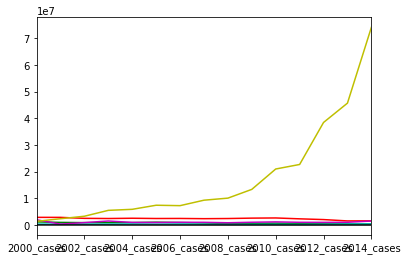

In [12]:
#Plot Malaria Cases for each Region
import matplotlib.pyplot as plt

t = s_df.transpose()

t = t[:15]


figure1 = plt.figure()

with pd.plot_params.use('x_compat', True):
    t['South-East Asia'].plot(color='r')
    t['Americas'].plot(color='g')
    t['Western Pacific'].plot(color='c')
    t['Eastern Mediterranean'].plot(color = 'm')
    t['Europe'].plot(color = 'k')
    t['Africa'].plot(color='y')
    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.show()
                        

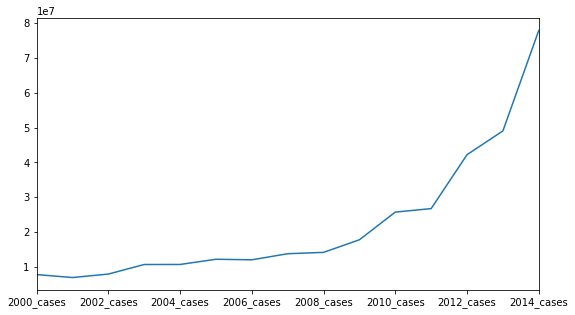

In [13]:
# Plot total Malaria Cases Globally
figure2 = plt.figure()
t['Global'].plot()

plt.show()

In [14]:
#Calculate portion of population (%) getting malaria per year for region

p_df = pd.DataFrame({}, index = ['Global'] + reg, columns = d)

for x in ['Global'] + reg:
    a = []
    for i in range(0, len(p_df.columns)):
        a.append(s_df.ix[x][malaria_col[i]]/(s_df.ix[x][pop_col[i]])*100)
    p_df.ix[x] = a

p_df


,2007,2008,2009,2010,2011,2012,2013,2014
Global,0.279768,0.283936,0.351857,0.502613,0.515401,0.804383,0.9226,1.44684
Eastern Mediterranean,0.327603,0.268871,0.320876,0.354119,0.301066,0.287838,0.291476,0.412878
Europe,0.000451873,0.000218677,0.000105483,6.13237e-05,2.51253e-05,7.58639e-06,1.07462e-06,7.10214e-07
Americas,0.156751,0.111028,0.111077,0.130369,0.0937258,0.0881233,0.0793563,0.0715525
South-East Asia,0.137768,0.139264,0.145734,0.14741,0.127606,0.110966,0.0823945,0.0833553
Western Pacific,0.0209522,0.0169563,0.0166888,0.0175141,0.0150798,0.0197209,0.0261402,0.0262243
Africa,1.38738,1.46321,1.88884,2.8906,3.04208,5.04802,5.84216,9.22705


In [15]:
ca_countries = ['Belize', 'Costa Rica', 'Guatemala', 'Honduras', 'Nicaragua','Panama']
central_am = c.ix[ca_countries]
central_am.ix['Regional Total'] = central_am.sum()
central_am

,2000_cases,2001_cases,2002_cases,2003_cases,2004_cases,2005_cases,2006_cases,2007_cases,2008_cases,2009_cases,...,2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
Belize,1486.0,1162.0,1134.0,1084.0,1066.0,1549.0,844.0,845.0,540.0,256.0,...,298407.0,306165.0,313929.0,321608.0,329192.0,336701.0,344181.0,351694.0,359288.0,366954.0
Costa Rica,1879.0,1363.0,1021.0,718.0,1289.0,3541.0,2903.0,1223.0,966.0,262.0,...,4369469.0,4429508.0,4488263.0,4545280.0,4600474.0,4654122.0,4706401.0,4757575.0,4807852.0,4857274.0
Guatemala,53311.0,35824.0,35540.0,31127.0,28955.0,39571.0,31093.0,15382.0,7198.0,7080.0,...,13700286.0,14006366.0,14316208.0,14630417.0,14948919.0,15271056.0,15596214.0,15923559.0,16252429.0,16582469.0
Honduras,35125.0,24149.0,17223.0,14063.0,17134.0,15943.0,11947.0,10512.0,8368.0,9313.0,...,7707972.0,7872658.0,8035021.0,8194778.0,8351600.0,8505646.0,8657785.0,8809216.0,8960829.0,9112867.0
Nicaragua,23878.0,10482.0,7695.0,6717.0,6897.0,6642.0,3114.0,1356.0,762.0,610.0,...,5522106.0,5594506.0,5666581.0,5737723.0,5807820.0,5877108.0,5945747.0,6013997.0,6082035.0,6149928.0
Panama,1036.0,928.0,2244.0,4500.0,5095.0,3667.0,1663.0,1281.0,744.0,778.0,...,3453807.0,3516268.0,3579385.0,3643222.0,3707782.0,3772938.0,3838462.0,3903986.0,3969249.0,4034119.0
Regional Total,116715.0,73908.0,64857.0,58209.0,60436.0,70913.0,51564.0,30599.0,18578.0,18299.0,...,35052047.0,35725471.0,36399387.0,37073028.0,37745787.0,38417571.0,39088790.0,39760027.0,40431682.0,41103611.0


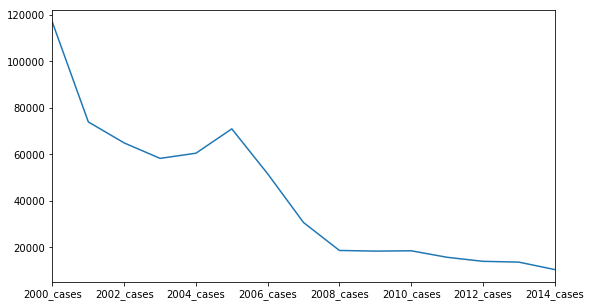

In [16]:
#Plot Total Malaria Cases in Central America 2000 to 2014

figure3 = plt.figure()
central_am.ix['Regional Total'].iloc[0:15].plot()

plt.show()

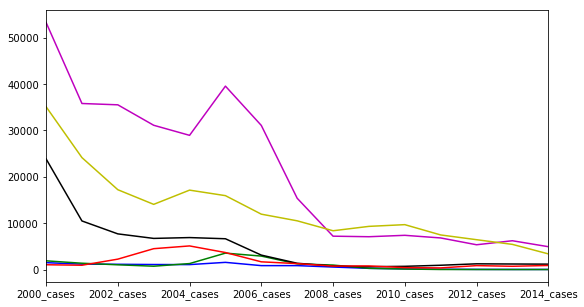

In [17]:
#Plot Maaria Cases in Central America by Country
figure4 = plt.figure()

central_am_T = central_am.transpose()
central_am_T = central_am_T[0:15]

with pd.plot_params.use('x_compat', True):
    
    central_am_T['Belize'].plot(color = 'b')
    central_am_T['Costa Rica'].plot(color = 'g')
    central_am_T['Guatemala'].plot(color = 'm')
    central_am_T['Honduras'].plot(color = 'y')
    central_am_T['Nicaragua'].plot(color = 'k')
    central_am_T['Panama'].plot(color = 'r')
    
plt.show()

In [18]:
#Calculate portion of population (%) getting malaria per year for region

ca_df = pd.DataFrame({}, columns = d, index = ca_countries)

for e in ca_countries:
    a = []
    for i in range(0, len(ca_df.columns)):
        a.append((central_am.ix[e].loc[malaria_col[i]])/(central_am.ix[e].loc[pop_col[i]])*100)
    ca_df.ix[e] = a

ca_df


,2007,2008,2009,2010,2011,2012,2013,2014
Belize,0.28317,0.176375,0.0815471,0.0466406,0.0218717,0.00980098,0.0058109,0.00540242
Costa Rica,0.0279897,0.0218083,0.00583745,0.00242009,0.000217369,0.000128918,0,0
Guatemala,0.112275,0.0513909,0.0494544,0.0504702,0.045602,0.0350074,0.039843,0.0309667
Honduras,0.136378,0.106292,0.115905,0.118185,0.0893841,0.0757027,0.062695,0.0383689
Nicaragua,0.0245558,0.0136205,0.0107649,0.0120605,0.0159268,0.0210137,0.0200816,0.0193382
Panama,0.0370895,0.0211588,0.0217356,0.0114734,0.00954749,0.0223698,0.0183667,0.0223874


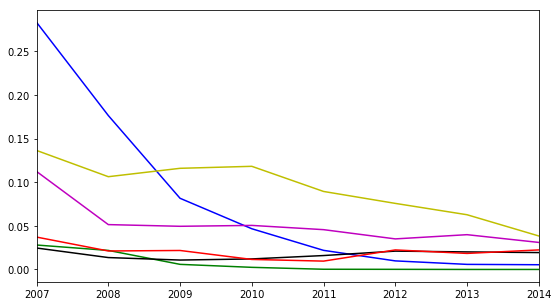

In [19]:
#Plot Malaria Case as % of population in Central America by Country

figure5 = plt.figure()

ca_T = ca_df.transpose()

with pd.plot_params.use('x_compat', True):
    
    ca_T['Belize'].plot(color = 'b')
    ca_T['Costa Rica'].plot(color = 'g')
    ca_T['Guatemala'].plot(color = 'm')
    ca_T['Honduras'].plot(color = 'y')
    ca_T['Nicaragua'].plot(color = 'k')
    ca_T['Panama'].plot(color = 'r')
    
plt.show()

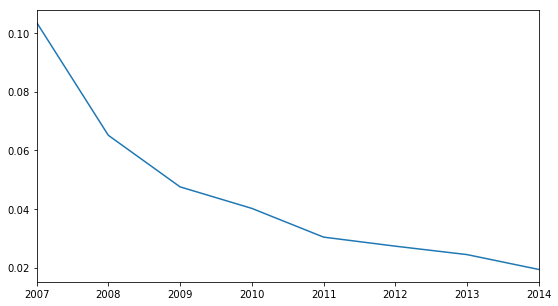

In [21]:
#Plot Malaria Case average as % of population in Central America region
ca_df.mean()

figure6 = plt.figure()

with pd.plot_params.use('x_compat', True):
    ca_df.mean().plot()
    
plt.show()